# Importing necessary libraries

### Group Members:

1. Akshay Padte - 1711036
2. Girish Thatte - 1711059
3. Abdeali Arsiwala - 1711064
4. Kaustubh Damania - 1711071
5. Arghyadeep Das - 1711072
6. Mihir Gada - 1711076

In [69]:
import numpy as np # numeric computations
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting graphs
import warnings # warnings
plt.style.use('seaborn') # Chaning the plot style
warnings.filterwarnings("ignore") # to ignore any warnings

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Loading the dataset

In [3]:
# Loading the IMDB dataset into pandas dataframe
df_movies = pd.read_csv('./dataset/movies.csv') # reading movies.csv file
df_ratings = pd.read_csv('./dataset/ratings.csv') # reading ratings.csv file

# Exploratory Data Analysis (EDA)

EDA involves looking at and describing the data set from various angles and then summarizing it. It is helpful in analyzing the distribution and statistics of our data.

In [4]:
# shape attribute tells us a number of tuples and feature variables in our dataset
print("Shape of df_movies: ", df_movies.shape)
print("Shape of df_ratings: ", df_ratings.shape)

Shape of df_movies:  (10329, 3)
Shape of df_ratings:  (105339, 4)


In [5]:
# print top 10 rows of dataframe - movies
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# print top 10 rows of dataframe - ratings
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


So, rating dataset has
1. userId - unique for each user
2. movieId - we can take the title of the movie from movies dataset
3. rating - Ratings given by each user to all the movies

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [8]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [10]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [11]:
# getting the number of movies under each genre
genrewise_movies_count = {}
for genres in df_movies["genres"]:
    for genre in genres.split("|"):
        genrewise_movies_count[genre] = genrewise_movies_count.get(genre, 0) + 1

print("Number of unique genres: ", len(list(genrewise_movies_count)))
genrewise_movies_count

Number of unique genres:  20


{'Adventure': 1164,
 'Animation': 401,
 'Children': 540,
 'Comedy': 3515,
 'Fantasy': 670,
 'Romance': 1788,
 'Drama': 5220,
 'Action': 1737,
 'Crime': 1440,
 'Thriller': 2187,
 'Horror': 1001,
 'Mystery': 675,
 'Sci-Fi': 860,
 'IMAX': 152,
 'War': 503,
 'Musical': 409,
 'Documentary': 415,
 'Western': 235,
 'Film-Noir': 195,
 '(no genres listed)': 7}

In [14]:
g = df_ratings.groupby('userId')['rating'].count()
topUsers = g.sort_values(ascending=False)[:15]
g = df_ratings.groupby('movieId')['rating'].count()
topMovies = g.sort_values(ascending=False)[:15]
top_r = df_ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,457,480,527,589,593,1196,1198,2571
userId,,,,,,,,,,,,,,,
62,2.0,3.0,3.0,2.5,5.0,4.5,4.0,1.0,3.0,5.0,4.0,4.5,3.0,1.0,1.5
63,NaN,4.5,3.0,4.5,3.5,4.0,4.5,3.0,3.0,NaN,3.5,3.5,5.0,4.0,5.0
128,3.0,5.0,4.5,3.5,5.0,5.0,4.5,4.0,3.5,3.5,3.5,4.0,4.0,4.0,4.0
224,4.5,5.0,4.0,3.5,4.5,5.0,5.0,4.0,4.5,4.0,4.5,4.0,4.5,4.0,4.5
232,3.5,NaN,4.0,4.0,4.5,4.0,4.0,4.5,3.5,NaN,4.5,4.0,4.0,5.0,4.5
310,3.0,4.0,4.0,3.0,4.0,4.5,3.5,4.0,3.0,4.0,4.5,3.5,3.5,3.0,4.0
413,4.0,2.5,NaN,4.0,4.5,5.0,4.0,NaN,5.0,4.0,4.0,3.5,4.0,4.0,5.0
451,3.5,4.5,4.0,4.5,4.5,4.0,NaN,4.0,4.0,NaN,4.0,5.0,4.0,4.5,3.5
458,3.5,5.0,5.0,4.5,5.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,4.5,5.0,5.0


## Data Visualisation

### Barplot of Genre-wise movies

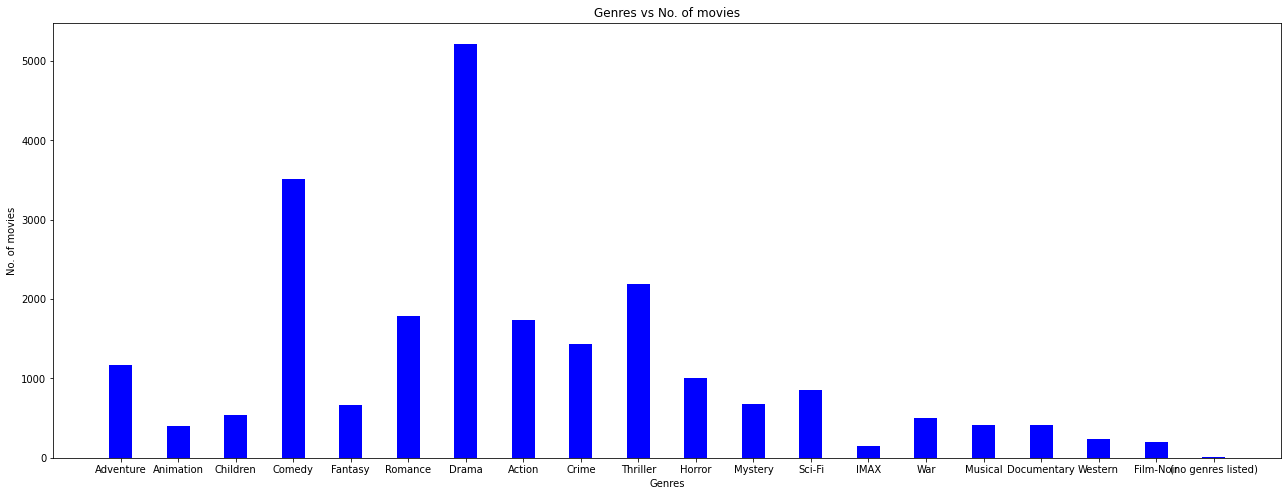

In [11]:
# Barplot of Genres vs No. of movies
genres = list(genrewise_movies_count.keys())
counts = list(genrewise_movies_count.values())

fig = plt.figure(figsize = (22, 8))
 
# creating the bar plot
plt.bar(genres, counts, color ='blue', width = 0.4) 
plt.xlabel("Genres")
plt.ylabel("No. of movies")
plt.title("Genres vs No. of movies")
plt.show()

Analysis : A large number of movies come under Drama and Comedy genre. Some movies are not listed in any genre.

### Scatter plot for MovieId vs Number of users voted

In [15]:
number_of_users_voted = df_ratings.groupby('movieId')['rating'].agg('count')
number_of_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

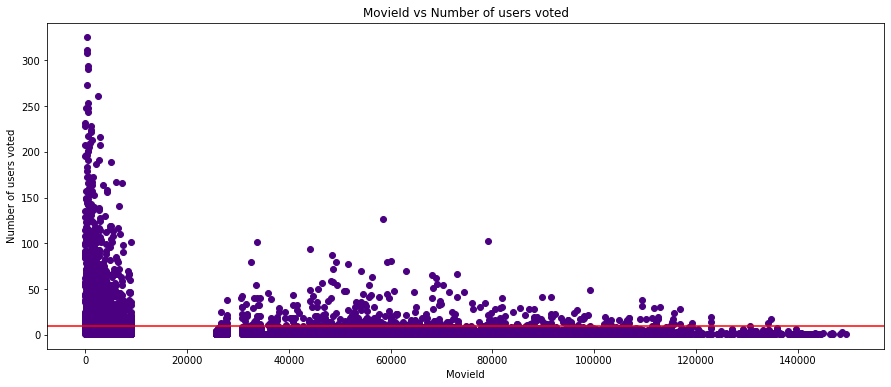

In [16]:
fig = plt.figure(figsize = (15, 6))
plt.scatter(number_of_users_voted.index, number_of_users_voted, color='indigo')
plt.axhline(y = 10, color = 'r')
plt.xlabel('MovieId')
plt.ylabel('Number of users voted')
plt.title('MovieId vs Number of users voted')
plt.show()

**Analysis : Movies with MovieId 0 to 500 are being voted by more number of user**

In [43]:
# Merge both the datasets
df = pd.merge(df_movies, df_ratings, on = 'movieId')
print(df.shape)
df.head(10)

(105339, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


In [44]:
# Groupby all movie titles together and find their mean ratings
# average rating of each movie.
df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

The average ratings are not sorted. Sort the ratings in the descending order of their average ratings.

In [45]:
# Sort movies based on ratings from highest to lowest
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
                                         ... 
Cold Weather (2010)                       0.5
Life During Wartime (2009)                0.5
Dark Days (2000)                          0.5
Biker Boyz (2003)                         0.5
Trog (1970)                               0.5
Name: rating, Length: 10323, dtype: float64

A movie can make it to the top of the  list even if only a single user has given it five stars rating. Thus, above stats can be misleading. Usually, a movie which is really a good one will receive a higher rating by a large number of users. So, we will look at the total number of ratings for movie.

In [46]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

Now we can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

## What is movie rating and how many users voted for this ?

In [47]:
# create a dataframe
data = pd.DataFrame(df.groupby('title')['rating'].mean())
data['rating_counts'] = pd.DataFrame(df['title'].value_counts())
data.sort_values(by=['rating_counts', 'rating'],ascending=False).head()

,rating,rating_counts
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


## How many users have rated a given movie ?

In [48]:
df['title'].value_counts()

Pulp Fiction (1994)                                                325
Forrest Gump (1994)                                                311
Shawshank Redemption, The (1994)                                   308
Jurassic Park (1993)                                               294
Silence of the Lambs, The (1991)                                   290
                                                                  ... 
Balzac and the Little Chinese Seamstress (Xiao cai feng) (2002)      1
Marie from the Bay of Angels (Marie Baie Des Anges) (1997)           1
Conformist, The (Conformista, Il) (1970)                             1
Convent, The (O Convento) (1995)                                     1
Friday After Next (2002)                                             1
Name: title, Length: 10323, dtype: int64

In [49]:
import re
def find_year(row):
    year = re.search('(\d\d\d\d)', row)
    if year is None:
        print(row)
        return None
    return year.group().strip()

find_year("Hello there, welcome to (2020) of (20201) here")

'2020'

In [50]:
df['year'] = df['title'].apply(find_year)
df['year'].head()

Li'l Quinquin (    )
Elämältä kaiken sain (    )


0    1995
1    1995
2    1995
3    1995
4    1995
Name: year, dtype: object

In [51]:
df.title = df.title.apply(lambda x: (x.strip())[:-7])

In [53]:
df.drop(['timestamp'], axis=1, inplace=True)

In [54]:
df.head()

,movieId,title,genres,userId,rating,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,5.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8,5.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,11,4.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,14,4.0,1995


## Exploring different types of Recommender Systems

### 1. Content-based recommender system using cosine similarity 

In [57]:
lemmatizer = WordNetLemmatizer()
genres = df_movies["genres"]
lemmatized = []
for i in range(len(genres)):
    temp = genres[i].lower()
    temp = temp.split("|")
    temp = [lemmatizer.lemmatize(word) for word in temp]
    lemmatized.append(" ".join(temp))

In [59]:
movies_dataset = pd.DataFrame(lemmatized,columns=["genres"], index=df_movies["title"])
movies_dataset

,genres
title,
Toy Story (1995),adventure animation child comedy fantasy
Jumanji (1995),adventure child fantasy
Grumpier Old Men (1995),comedy romance
Waiting to Exhale (1995),comedy drama romance
Father of the Bride Part II (1995),comedy
...,...
Cosmic Scrat-tastrophe (2015),animation child comedy
Le Grand Restaurant (1966),comedy
A Very Murray Christmas (2015),comedy


In [70]:
cv = CountVectorizer()
genre_cv = cv.fit_transform(movies_dataset["genres"]).toarray()
genre_cv

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
print("Genres coresponding to the count vector are :\n",cv.get_feature_names())

Genres coresponding to the count vector are :
 ['action', 'adventure', 'animation', 'child', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir', 'romance', 'sci', 'thriller', 'war', 'western']


In [73]:
genre_dataset = df_movies[['movieId', 'title']]
genre_dataset = genre_dataset.join(pd.DataFrame(genre_cv))
genre_dataset.head(10)

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [120]:
similarities = cosine_similarity(genre_cv) 

In [122]:
similarities.shape

(10329, 10329)

In [101]:
user_id = 2 #For user 18 lets recommend movies based on his recent watched movie
timestamp = df_ratings.loc[df_ratings["userId"] == user_id]
latest_movieId_watched_by_user = timestamp.sort_values(by="timestamp",ascending=False)["movieId"].values[0]
latest_movieId_watched_by_user

1356

In [102]:
movie_index = df_movies.loc[df_movies['movieId'] == latest_movieId_watched_by_user,["title"]].index[0]
genre_dataset.loc[genre_dataset['movieId'] == 1356,:]

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
1102,1356,Star Trek: First Contact (1996),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [113]:
movie_index = df_movies.loc[df_movies['movieId'] == latest_movieId_watched_by_user,["title"]].index[0]
similarity_values = pd.Series(similarities[movie_index])
similarity_values.sort_values(ascending=False)

similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes.remove(movie_index)

In [117]:
similarity_values_list = list(similarity_values.sort_values(ascending=False))

In [104]:
def get_movie_by_index(idx):
    return movies_dataset.index[idx]

def get_movie_by_id(movie_id):
    return df_movies.loc[df_movies['movieId'] == movie_id,['title']].values[0][0]

In [106]:
get_movie_by_index(1102)

'Star Trek: First Contact (1996)'

In [107]:
get_movie_by_id(1356)

'Star Trek: First Contact (1996)'

In [136]:
uid = int(input("Enter your User ID: "))
no_of_recs = int(input("Enter number of movie recommendations you want: "))
timestamp = df_ratings.loc[df_ratings["userId"] == uid]
latest_movieId_watched_by_user = timestamp.sort_values(by="timestamp",ascending=False)["movieId"].values[0]

movie_index = df_movies.loc[df_movies['movieId'] == latest_movieId_watched_by_user,["title"]].index[0]
similarity_values = pd.Series(similarities[movie_index])
similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes.remove(movie_index)
similarity_values_list = list(similarity_values.sort_values(ascending=False))
similarity_values_list.remove(0)

print("The latest movie watched by you is: ", get_movie_by_id(latest_movieId_watched_by_user))
print("\nBased on your latest movie watched, here are top 10 recommendations we think you may like: ")
for i in range(no_of_recs):
    print(f'{i+1}. {get_movie_by_index(similar_movie_indexes[i])}, Similarity: {similarity_values_list[i]}')

Enter your User ID: 2
Enter number of movie recommendations you want: 30
The latest movie watched by you is:  Star Trek: First Contact (1996)

Based on your latest movie watched, here are top 10 recommendations we think you may like: 
1. Vice (2015), Similarity: 0.9999999999999999
2. Spawn (1997), Similarity: 0.9999999999999999
3. Spider-Man (2002), Similarity: 0.9999999999999999
4. X2: X-Men United (2003), Similarity: 0.9999999999999999
5. Terminator Genisys (2015), Similarity: 0.9999999999999999
6. Escape from New York (1981), Similarity: 0.9999999999999999
7. Abyss, The (1989), Similarity: 0.9999999999999999
8. Jurassic Park III (2001), Similarity: 0.9999999999999999
9. Clockstoppers (2002), Similarity: 0.9999999999999999
10. Street Fighter: The Legend of Chun-Li (2009), Similarity: 0.9999999999999999
11. You Only Live Twice (1967), Similarity: 0.9999999999999999
12. War of the Worlds (2005), Similarity: 0.9999999999999999
13. Jurassic World (2015), Similarity: 0.9999999999999999
14

## Thus, we recommend films to a user based on genres of latest movie seen by the user and generate top N recommendations. We made use of cosine similarity to find similar movies based on genre.

### 2. Movie recommender system based on collaborative filtering